# Analytics On Spotify Dataset :- 
### Project Topic :- Using spotify songs, to get regional sentiments and see how it correlates with the financial stock market data

In [14]:
#loading necessary librarires
#Pandas for importing csv and performing manipulation of dataframe
import pandas as pd
#Numpy for matrix manipulation
import numpy as np
#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Spotipy for accessing spotify music database
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Regular expression
import re
# importing tqdm to get loading bar
from tqdm import tqdm

### Spotify releases daily, as well as weekly top 200 songs data on "spotifycharts.com", with details of title, rank, date, artist name, region and no of streams

### For our purpose, we have collected daily top 200 songs starting from 2017 till 2021, this was collected from kaggle

In [2]:
#Importing the dataset 
Reading_csv = pd.read_csv("D:\charts.csv\charts.csv")

### Exploratory Data Analysis  

### Lets see the first five rows of the dataset to understand the data better

In [3]:
Reading_csv.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [4]:
#checking the shape of dataframe
Reading_csv.shape

(26173514, 9)

### We have over 26 million dataset, which will be used for purposes of analysis

In [5]:
#Changing date into datetime format
Reading_csv['date']= pd.to_datetime(Reading_csv['date'])

In [6]:
#Lets see number of streams, trends, region-wise 
Country_wise_streams = Reading_csv.groupby(["date","region"])["streams"].mean().to_frame(name = 'Mean Streams').reset_index()


<AxesSubplot:xlabel='region'>

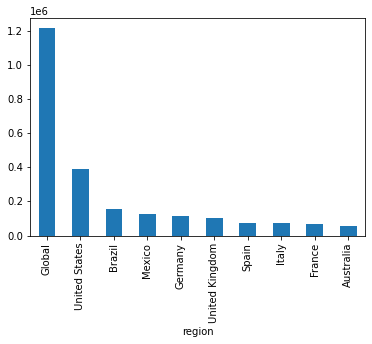

In [7]:
#Country with highest average stream
Reading_csv.groupby("region")["streams"].mean().sort_values(ascending=False)[0:10].plot.bar()

### These are the top 10 countries where spotify is used extensively, and hence we could narrow our search.

<AxesSubplot:xlabel='date', ylabel='Mean Streams'>

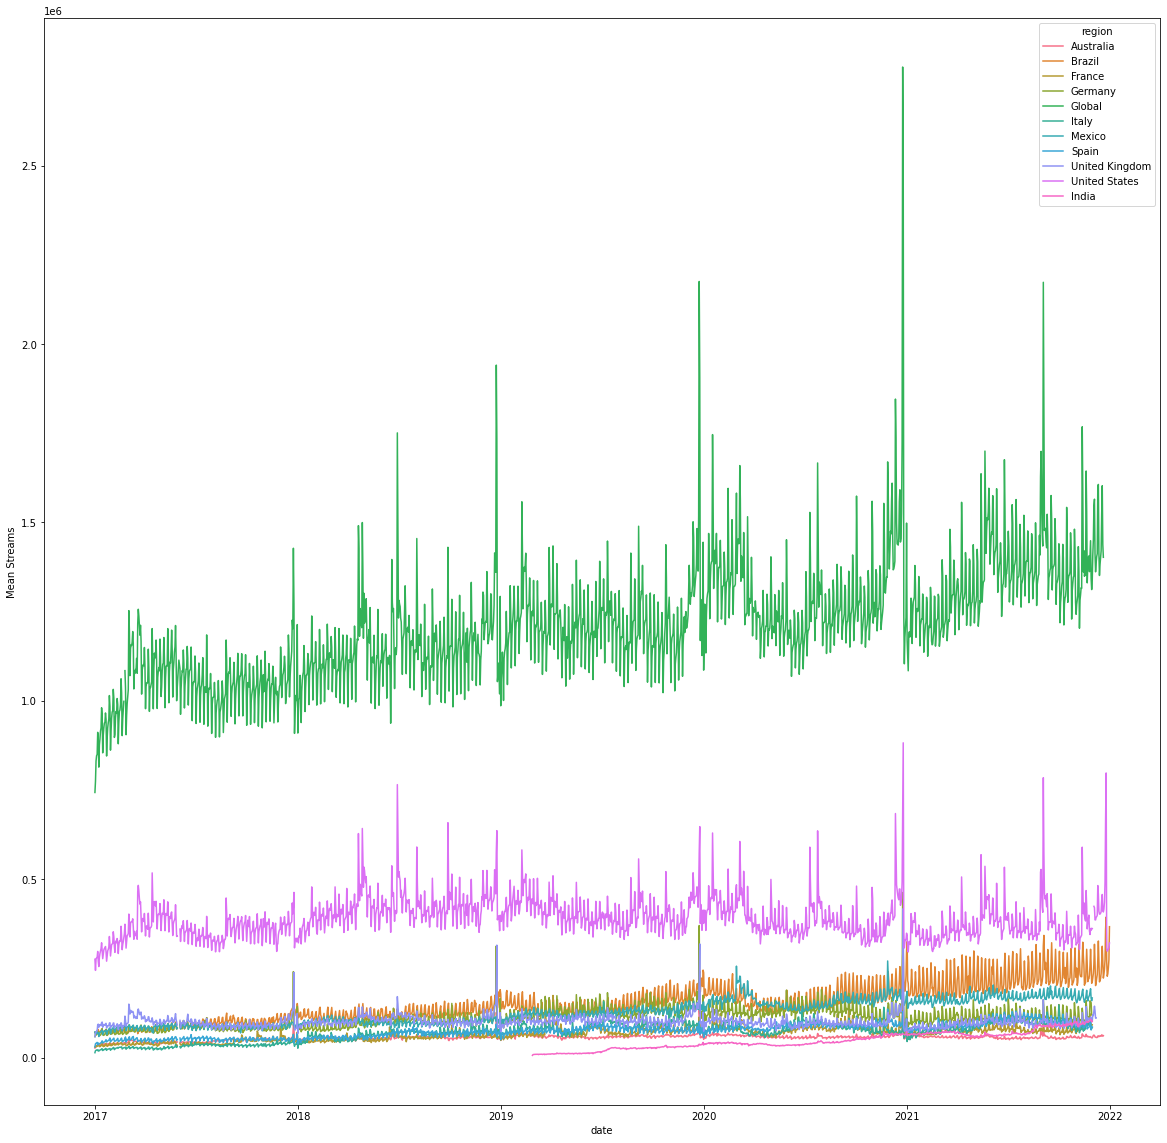

In [8]:
plt.figure(figsize=(20,20))
sns.lineplot(data=Country_wise_streams[(Country_wise_streams["region"]=="United Kingdom") | (Country_wise_streams["region"]=="United States") | (Country_wise_streams["region"]=="India")| (Country_wise_streams["region"]=="Global")| (Country_wise_streams["region"]=="Brazil")| (Country_wise_streams["region"]=="Mexico")| (Country_wise_streams["region"]=="Germany")| (Country_wise_streams["region"]=="Spain")| (Country_wise_streams["region"]=="Italy")| (Country_wise_streams["region"]=="France")| (Country_wise_streams["region"]=="Australia")], x="date",y="Mean Streams",hue="region")

### The figure represents mean number of daily stream of top 200 songs, from 2017 until 2022

### In order to get the valence score for the imported songs we need to make spotify API calls. Valence is the indicator, which is evaluated by music experts at spotify and its value ranges from 0 to 1, 0 meaning sad song, while 1 meaning happy song

### Lets set-up the credentials, while will be used to make the API calls in future

In [9]:
#importing necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Client ID, obtained from the dashboard
SPOTIPY_CLIENT_ID='854e31ffce144cd6bb8d6f6332126cf5'
#Client secret, obtained from the dashboard
SPOTIPY_CLIENT_SECRET= '2b82b02c8a27408790065f416daf5c3f'
#creating a sp object, which will be called to query required spotify data
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
sp.me

<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001EA341DA3A0>>

### Data Preparation :- Getting Country-wise Valence score of top 5 regions, where spotify is widely used, which are :- 
#### 1. United States
#### 2. Brazil
#### 3. Mexico
#### 4. Germany
#### 5. United Kingdom

### Lets Get USA, valence indicators

In [10]:
Reading_csv['id'] = Reading_csv['url'].apply(lambda x: re.findall('([0-9][\s\S]*)$',x)[0])

In [11]:
USA_top200 = Reading_csv[Reading_csv["region"]=="United States"]

In [12]:
# The data will have songs repeated, and so will the track id, its better to get the unique track id and make calls to spotify API to save time
USA_uniq_url = USA_top200["id"].unique()

In [13]:
features = []
#for track in audio_features:
 #       features.append(track)
for i in tqdm(USA_uniq_url):
    audio_features = sp.audio_features(i)[0]
    features.append(audio_features)
features_df = pd.DataFrame(features) 
#to get the songs feature added to the previous dataframe
USA_songs_df= pd.merge(features_df, USA_top200, on='id', how='inner')
#saving the dataframe locally, as the above opertion is time taking
USA_song_df.to_csv("USA_song_df.csv")

NameError: name 'tqdm' is not defined

### Lets Get Brazil, Valence Indicators

In [15]:
Brazil_top200 = Reading_csv[Reading_csv["region"]=="Brazil"]
# The data will have songs repeated, and so will the track id, its better to get the unique track id and make calls to spotify API to save time
Brazil_uniq_url = Brazil_top200["id"].unique()
#for track in audio_features:
 #       features.append(track)
for i in tqdm(Brazil_uniq_url):
    audio_features = sp.audio_features(i)[0]
    features.append(audio_features)
features_df = pd.DataFrame(features) 
#to get the songs feature added to the previous dataframe
Brazil_songs_df= pd.merge(features_df, Brazil_top200, on='id', how='inner')
#saving the dataframe locally, as the above opertion is time taking
USA_song_df.to_csv("Brazil_song_df.csv")


100%|██████████| 9414/9414 [13:12<00:00, 11.87it/s]  


NameError: name 'features1' is not defined

### We first begin by analyzing USA dataset, by seeing its correlation with S&P 500 and NASDAQ, daily data

In [16]:
USA_song_df = pd.read_csv("USA_song_df.csv")

### Lets see the first few rows of the prepared USA, daily top 200 data, from 2017 to 2021

In [17]:
USA_song_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,time_signature,title,rank,date,artist,region,chart,trend,streams
0,0,0.926,0.666,11,-5.314,1,0.2440,0.06110,0.000000,0.1230,...,343150,4,Bad and Boujee (feat. Lil Uzi Vert),1,2017-01-01,Migos,United States,top200,SAME_POSITION,1371493.0
1,27418,0.762,0.666,0,-6.055,1,0.0916,0.00427,0.000000,0.1270,...,232093,4,Really Really,185,2017-01-01,Kevin Gates,United States,top200,MOVE_DOWN,149053.0
2,27409,0.611,0.700,9,-5.331,1,0.0436,0.01990,0.000000,0.0549,...,220573,4,Middle,184,2017-01-01,"DJ Snake, Bipolar Sunshine",United States,top200,MOVE_DOWN,149265.0
3,27354,0.595,0.662,11,-6.858,0,0.0362,0.01780,0.000000,0.0804,...,218447,4,Lighthouse - Andrelli Remix,183,2017-01-01,Hearts & Colors,United States,top200,MOVE_DOWN,149929.0
4,27279,0.569,0.761,5,-6.071,0,0.4750,0.26100,0.000007,0.0748,...,184000,4,Timeless (feat. DJ SPINKING),182,2017-01-01,A Boogie Wit da Hoodie,United States,top200,MOVE_DOWN,150458.0


### We have the following columns in the dataset

In [18]:
USA_song_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'url', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'title', 'rank', 'date', 'artist',
       'region', 'chart', 'trend', 'streams'],
      dtype='object')

### Converting the date column into datetime format

In [19]:
USA_song_df["date"] = pd.to_datetime(USA_song_df["date"])

### Lets get only few columns, which will be helpful in studying the data further

In [20]:
df = USA_song_df.groupby("date")[["valence","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","tempo"]].mean()

In [21]:
#printing the value as data-frame
df = df.reset_index()
df = df.rename(columns={"date": "Date"})
df

,Date,valence,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo
0,2017-01-01,0.492401,0.663936,0.613292,5.368,-7.416108,0.596,0.124714,0.198896,0.030479,0.180580,122.473300
1,2017-01-02,0.441118,0.660660,0.603856,5.316,-7.116724,0.564,0.134971,0.211696,0.025383,0.172989,120.612240
2,2017-01-03,0.435576,0.666648,0.600927,5.228,-7.112056,0.536,0.135756,0.218104,0.016552,0.164992,121.103244
3,2017-01-04,0.434716,0.666992,0.605056,5.204,-6.992640,0.544,0.136420,0.220454,0.016665,0.167797,122.253008
4,2017-01-05,0.439952,0.670932,0.604552,5.236,-6.934576,0.540,0.138137,0.223657,0.018135,0.170918,122.224648
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,0.465930,0.657016,0.610176,4.540,-6.934032,0.636,0.121388,0.251793,0.037644,0.181452,123.319512
1822,2021-12-28,0.459430,0.661140,0.610960,4.520,-6.884508,0.636,0.120431,0.245971,0.037644,0.178365,122.883804
1823,2021-12-29,0.461668,0.660236,0.616168,4.560,-6.814508,0.648,0.118047,0.244089,0.037628,0.179467,122.422696
1824,2021-12-30,0.462518,0.660128,0.615872,4.584,-6.852580,0.644,0.116932,0.242179,0.037629,0.182258,122.669864


### Lets install pandas_datareader library, which will be used to get stock market data 

In [11]:
!pip install pandas_datareader

In [22]:
#loading necessary libraries
from pandas_datareader.data import DataReader
#loading datetime library to call the relavant stock market data
from datetime import datetime


### Lets get Apple data  :- And see the basic correlation with the song's valence, we will later see the effect of S&P 500 and NASDAQ data

In [23]:
import pandas_datareader as pdr
import datetime as dt
ticker = "AAP"
start= dt.datetime (2017, 1, 1)
end= dt.datetime (2021, 1, 30)
data = pdr.get_data_yahoo(ticker, start,end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,171.360001,169.309998,170.779999,170.600006,691300.0,163.169739
2017-01-04,173.169998,170.369995,170.369995,172.000000,641700.0,164.508743
2017-01-05,173.059998,170.229996,170.869995,171.880005,861000.0,164.393997
2017-01-06,171.990005,169.300003,171.320007,169.630005,828000.0,162.241989
2017-01-09,170.279999,168.320007,170.059998,169.529999,560100.0,162.146362
...,...,...,...,...,...,...
2021-01-25,164.669998,156.389999,163.679993,159.660004,1847100.0,154.706543
2021-01-26,160.110001,156.559998,160.009995,157.630005,824700.0,152.739532
2021-01-27,154.449997,143.149994,152.649994,147.929993,3368300.0,143.340469


In [24]:
merged_df_USA = pd.merge(df, data, on ="Date", how ="inner")
merged_df_USA

,Date,valence,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,0.435576,0.666648,0.600927,5.228,-7.112056,0.536,0.135756,0.218104,0.016552,0.164992,121.103244,171.360001,169.309998,170.779999,170.600006,691300.0,163.169739
1,2017-01-04,0.434716,0.666992,0.605056,5.204,-6.992640,0.544,0.136420,0.220454,0.016665,0.167797,122.253008,173.169998,170.369995,170.369995,172.000000,641700.0,164.508743
2,2017-01-05,0.439952,0.670932,0.604552,5.236,-6.934576,0.540,0.138137,0.223657,0.018135,0.170918,122.224648,173.059998,170.229996,170.869995,171.880005,861000.0,164.393997
3,2017-01-06,0.438108,0.667940,0.598776,5.208,-6.957628,0.536,0.136861,0.237315,0.019336,0.166951,121.565448,171.990005,169.300003,171.320007,169.630005,828000.0,162.241989
4,2017-01-09,0.432372,0.658476,0.589656,5.084,-7.009332,0.604,0.142519,0.247206,0.020330,0.167113,120.864644,170.279999,168.320007,170.059998,169.529999,560100.0,162.146362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2021-01-25,0.484639,0.673624,0.604456,5.032,-6.748940,0.560,0.117684,0.266267,0.018288,0.176615,121.489388,164.669998,156.389999,163.679993,159.660004,1847100.0,154.706543
1022,2021-01-26,0.485846,0.676020,0.610512,5.076,-6.708700,0.560,0.118728,0.260869,0.025024,0.177294,121.818504,160.110001,156.559998,160.009995,157.630005,824700.0,152.739532
1023,2021-01-27,0.483742,0.675672,0.604714,5.104,-6.845576,0.564,0.119098,0.268075,0.022084,0.175236,121.818384,154.449997,143.149994,152.649994,147.929993,3368300.0,143.340469
1024,2021-01-28,0.482299,0.676868,0.603410,5.028,-6.841016,0.568,0.118729,0.261787,0.025314,0.174372,121.380348,154.669998,148.500000,149.619995,153.339996,1634500.0,148.582626


In [25]:
merged_df_USA = merged_df_USA.set_index('Date')

### Standardizing the dataset

In [26]:
normalized_df_USA = (merged_df_USA-merged_df_USA.mean())/merged_df_USA.std()
normalized_df_USA

,valence,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,,,,,,,,,
2017-01-03,-1.142397,-2.034057,-0.107592,-0.596359,-1.283177,-1.440670,-0.302317,-0.231402,0.930919,-0.390134,-0.470654,1.161293,1.231148,1.207275,1.207283,-0.570039,1.170553
2017-01-04,-1.180491,-2.013895,0.117756,-0.707537,-0.934948,-1.222672,-0.239213,-0.168964,0.950983,-0.098187,0.196244,1.234211,1.273883,1.190779,1.263740,-0.622868,1.226508
2017-01-05,-0.948561,-1.782969,0.090246,-0.559299,-0.765627,-1.331671,-0.076055,-0.083864,1.209849,0.226604,0.179794,1.229779,1.268239,1.210895,1.258901,-0.389292,1.221713
2017-01-06,-1.030241,-1.958332,-0.225036,-0.689008,-0.832849,-1.440670,-0.197283,0.278978,1.421442,-0.186233,-0.202562,1.186674,1.230745,1.229001,1.168166,-0.424440,1.131783
2017-01-09,-1.284336,-2.513021,-0.722819,-1.263432,-0.983623,0.412311,0.340392,0.541759,1.596599,-0.169415,-0.609049,1.117784,1.191236,1.178307,1.164133,-0.709780,1.127787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,1.030866,-1.625190,0.085027,-1.504320,-0.224294,-0.786677,-2.019843,1.048178,1.236772,0.819530,-0.246679,0.891779,0.710265,0.921620,0.766109,0.661000,0.816885
2021-01-26,1.084322,-1.484759,0.415593,-1.300492,-0.106950,-0.786677,-1.920587,0.904756,2.423406,0.890175,-0.055782,0.708074,0.717119,0.773965,0.684246,-0.427955,0.734686
2021-01-27,0.991142,-1.505156,0.099123,-1.170783,-0.506094,-0.677678,-1.885462,1.096193,1.905591,0.675993,-0.055851,0.480055,0.176481,0.477850,0.293078,2.281225,0.341910


In [ ]:
import statsmodels.tsa.stattools as smt

''

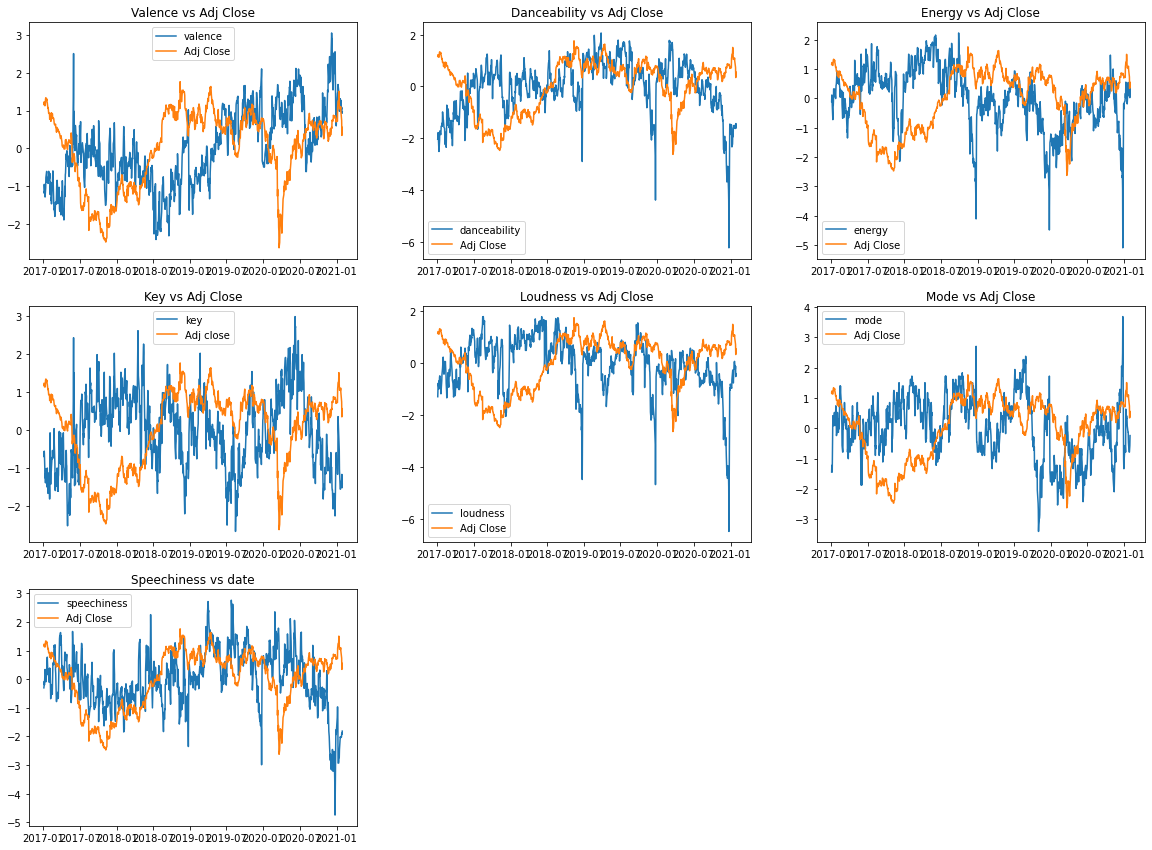

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.plot(normalized_df_USA["valence"],label="valence")
plt.plot(normalized_df_USA["Adj Close"],label="Adj Close")
plt.title('Valence vs Adj Close')
plt.legend()
plt.subplot(4,3,2)
plt.plot(normalized_df_USA["danceability"],label="danceability")
plt.plot(normalized_df_USA["Adj Close"],label="Adj Close")
plt.title('Danceability vs Adj Close')
plt.legend()
plt.subplot(4,3,3)
plt.plot(normalized_df_USA["energy"], label="energy",)
plt.plot(normalized_df_USA["Adj Close"], label= "Adj Close")
plt.title("Energy vs Adj Close")
plt.legend()
plt.subplot(4,3,4)
plt.plot(normalized_df_USA["key"],label="key")
plt.plot(normalized_df_USA["Adj Close"], label ="Adj close")
plt.title("Key vs Adj Close")
plt.legend()
plt.subplot(4,3,5)
plt.plot(normalized_df_USA["loudness"],label="loudness")
plt.plot(normalized_df_USA["Adj Close"],label="Adj Close")
plt.title("Loudness vs Adj Close")
plt.legend()
plt.subplot(4,3,6)
plt.plot(normalized_df_USA["mode"], label="mode")
plt.plot(normalized_df_USA["Adj Close"], label ="Adj Close")
plt.title("Mode vs Adj Close")
plt.legend()
plt.subplot(4,3,7)
plt.plot(normalized_df_USA["speechiness"], label="speechiness")
plt.plot(normalized_df_USA["Adj Close"], label = "Adj Close")
plt.title('Speechiness vs date')
plt.legend()

;


### The above graphs shows, the trend of various indicators and stock market data for "AAP" (Apple), these indicators are valence,Danceability,Energy,Key,Loudness,Mode and Speechiness

In [22]:
normalized_df_USA[["valence","Adj Close"]]

,valence,Adj Close
Date,,
2017-01-03,-1.142397,1.170553
2017-01-04,-1.180491,1.226508
2017-01-05,-0.948561,1.221714
2017-01-06,-1.030241,1.131784
2017-01-09,-1.284336,1.127786
...,...,...
2021-01-25,1.030866,0.816886
2021-01-26,1.084322,0.734686
2021-01-27,0.991142,0.341910


In [29]:
USA_song_df = pd.read_csv("USA_song_df.csv")


In [30]:
USA_song_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'url', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'title', 'rank', 'date', 'artist',
       'region', 'chart', 'trend', 'streams'],
      dtype='object')

In [31]:
USA_song_df["date"] = pd.to_datetime(USA_song_df["date"])

In [32]:
USA_song_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'url', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'title', 'rank', 'date', 'artist',
       'region', 'chart', 'trend', 'streams'],
      dtype='object')

In [33]:
USA_song_df[["date","valence"]]

,date,valence
0,2017-01-01,0.1680
1,2017-01-01,0.2780
2,2017-01-01,0.2130
3,2017-01-01,0.4170
4,2017-01-01,0.3250
...,...,...
455052,2021-12-31,0.3700
455053,2021-12-31,0.7000
455054,2021-12-31,0.0823
455055,2021-12-31,0.3980


In [34]:
df = USA_song_df[["date","valence"]].groupby("date")['valence'].describe().drop(columns = ['min','max','count']).reset_index()



In [35]:
df = df.rename(columns={"date": "Date"})

In [36]:
df.head()

,Date,mean,std,25%,50%,75%
0,2017-01-01,0.492401,0.247921,0.28050,0.4670,0.70800
1,2017-01-02,0.441118,0.214292,0.26775,0.4295,0.60700
2,2017-01-03,0.435576,0.212973,0.26025,0.4135,0.60375
3,2017-01-04,0.434716,0.212300,0.26175,0.4180,0.59250
4,2017-01-05,0.439952,0.210511,0.27650,0.4280,0.60275


### NASDAQ data

In [37]:
import pandas_datareader as pdr
import datetime as dt
ticker = "NQ=F"
start= dt.datetime (2017, 1, 1)
end= dt.datetime (2021, 12, 31)
data_NASDAQ = pdr.get_data_yahoo(ticker, start,end)
data_NASDAQ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,4927.50,4876.75,4876.75,4906.25,215983,4906.25
2017-01-04,4942.50,4903.00,4906.50,4933.50,171952,4933.50
2017-01-05,4964.25,4920.50,4934.75,4962.00,169565,4962.00
2017-01-06,5017.50,4952.50,4962.50,5004.00,183315,5004.00
2017-01-09,5029.50,5002.50,5004.50,5022.00,148112,5022.00


### S&P 500

In [38]:
ticker = "^GSPC"
start= dt.datetime (2017, 1, 1)
end= dt.datetime (2021, 12, 31)
data_SP500 = pdr.get_data_yahoo(ticker, start,end)
data_SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902


In [39]:
NASDAQ_data= pd.merge(df, data_NASDAQ, on ="Date", how ="inner")[["mean","std","25%","50%","75%","High","Low","Open","Close","Adj Close","Date"]]
NASDAQ_data.head()

,mean,std,25%,50%,75%,High,Low,Open,Close,Adj Close,Date
0,0.435576,0.212973,0.26025,0.4135,0.60375,4927.50,4876.75,4876.75,4906.25,4906.25,2017-01-03
1,0.434716,0.212300,0.26175,0.4180,0.59250,4942.50,4903.00,4906.50,4933.50,4933.50,2017-01-04
2,0.439952,0.210511,0.27650,0.4280,0.60275,4964.25,4920.50,4934.75,4962.00,4962.00,2017-01-05
3,0.438108,0.212892,0.26775,0.4210,0.59250,5017.50,4952.50,4962.50,5004.00,5004.00,2017-01-06
4,0.432372,0.218671,0.25325,0.4085,0.59250,5029.50,5002.50,5004.50,5022.00,5022.00,2017-01-09


### cross correlation between Mean valence and Adj Close for NASDAQ data :- Before making the data stationary

In [40]:
import statsmodels.api as sm
cross_corr = sm.tsa.stattools.ccf(list(NASDAQ_data.reset_index()["mean"]), list(NASDAQ_data.reset_index()["Adj Close"]), adjusted=False)
dicti = {}
for i in range(0,len(cross_corr)):
    dicti[i+1] = cross_corr[i]


In [35]:
dicti

{1: 0.5341640498371195,
 2: 0.5322142346349003,
 3: 0.5304941642567111,
 4: 0.5288168380868387,
 5: 0.5272274816628694,
 6: 0.5255428539475402,
 7: 0.5238573032156326,
 8: 0.5218638426267748,
 9: 0.5198589950633494,
 10: 0.5178065812830109,
 11: 0.5161120072977549,
 12: 0.5143959387134541,
 13: 0.5122463167893905,
 14: 0.5102233140442634,
 15: 0.508692527075416,
 16: 0.506389635840129,
 17: 0.5042858126021563,
 18: 0.5020666070502455,
 19: 0.5000048998200408,
 20: 0.4977958619032421,
 21: 0.4953885654601426,
 22: 0.49308749345889263,
 23: 0.4911608586378117,
 24: 0.4887259925185146,
 25: 0.4863471586086277,
 26: 0.482940861490592,
 27: 0.4795143717601216,
 28: 0.4761739697678161,
 29: 0.47296128261929177,
 30: 0.4706688702048431,
 31: 0.46788969947853126,
 32: 0.4654539012658458,
 33: 0.4630458940108145,
 34: 0.46058249938171725,
 35: 0.4576252148765037,
 36: 0.4544665530787808,
 37: 0.45103788661790933,
 38: 0.447618185843099,
 39: 0.4449802613534696,
 40: 0.4423537122342103,
 41: 0.4

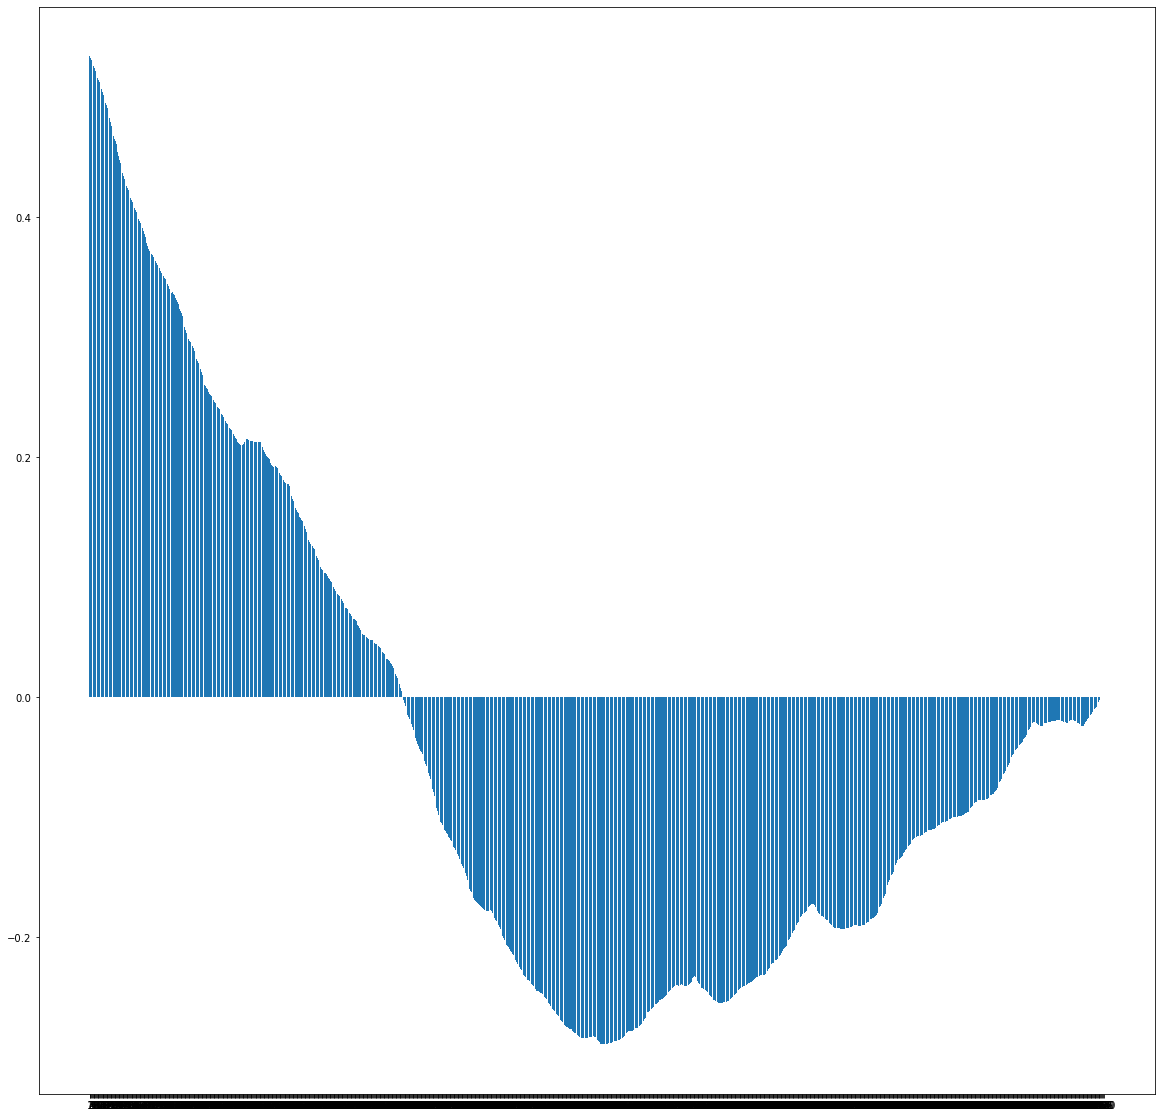

In [36]:
plt.figure(figsize=(20,20))
names = list(dicti.keys())
values = list(dicti.values())
plt.bar(range(len(dicti)), values, tick_label=names)
plt.show()

### importing statsmodels, which will help us perform time series analysis

In [41]:
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

### Lets see ACF/PACF plot of mean valence before differencing the dataset

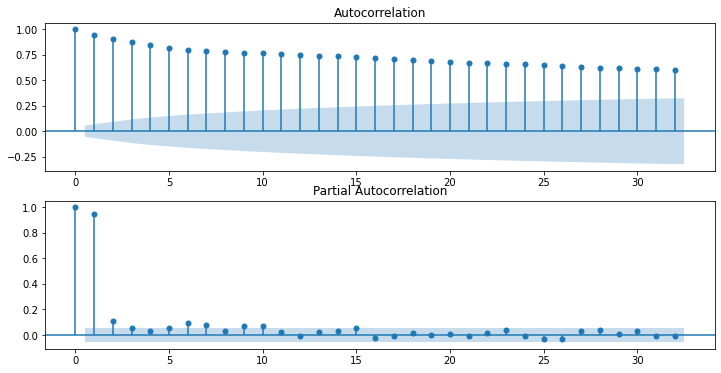

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_acf_pacf_plots(df):
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df, ax=ax[0])
    ax[1] = plot_pacf(df, ax=ax[1])


get_acf_pacf_plots(NASDAQ_data["mean"])
plt.show()

### Lets see ACF/PACF plot of mean valence after differencing the dataset once

In [67]:
series2 = NASDAQ_data["mean"].diff().dropna()

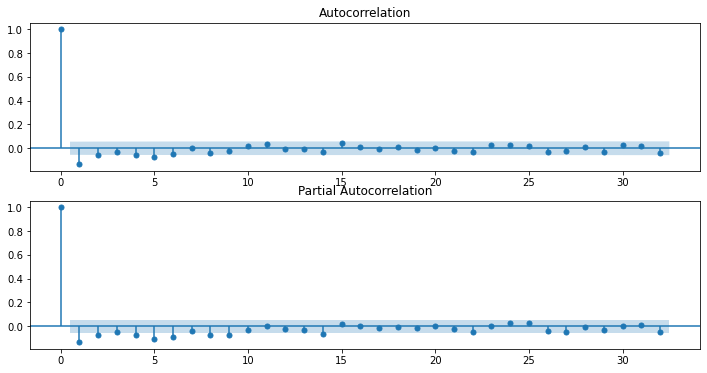

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_acf_pacf_plots(df):
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df, ax=ax[0])
    ax[1] = plot_pacf(df, ax=ax[1])


get_acf_pacf_plots(series2)
plt.show()

### Do we need to difference the data ?

In [46]:
NASDAQ_data.head()

,mean,std,25%,50%,75%,High,Low,Open,Close,Adj Close,Date
0,0.435576,0.212973,0.26025,0.4135,0.60375,4927.50,4876.75,4876.75,4906.25,4906.25,2017-01-03
1,0.434716,0.212300,0.26175,0.4180,0.59250,4942.50,4903.00,4906.50,4933.50,4933.50,2017-01-04
2,0.439952,0.210511,0.27650,0.4280,0.60275,4964.25,4920.50,4934.75,4962.00,4962.00,2017-01-05
3,0.438108,0.212892,0.26775,0.4210,0.59250,5017.50,4952.50,4962.50,5004.00,5004.00,2017-01-06
4,0.432372,0.218671,0.25325,0.4085,0.59250,5029.50,5002.50,5004.50,5022.00,5022.00,2017-01-09


### When applying forecasting, lets make use of VAR and here we are dealing with multivariate problem, and hence, lets consider mean valence and Adj Close

In [47]:
NASDAQ_VAR = NASDAQ_data[["mean","Adj Close","Date"]]

In [48]:
NASDAQ_VAR = NASDAQ_VAR.set_index("Date")

### Standardizing the data

In [49]:
NASDAQ_VAR_std = (NASDAQ_VAR - NASDAQ_VAR.mean())/NASDAQ_VAR.std()

Text(0.5, 1.0, 'Stanardized Mean valence and Adj close(NASDAQ)')

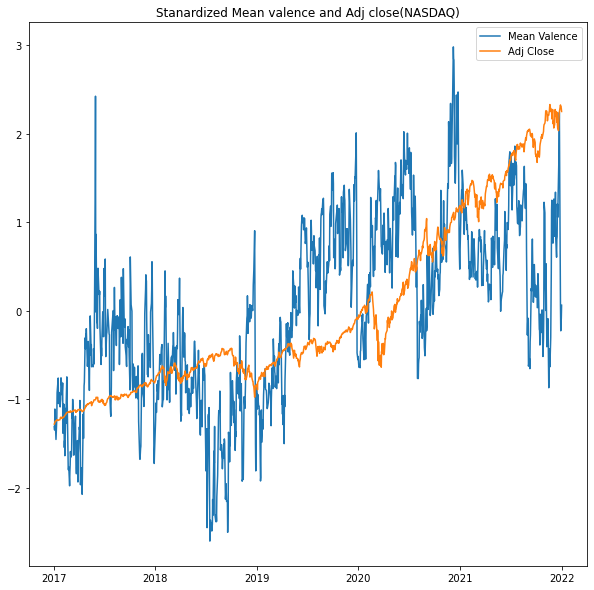

In [50]:
plt.figure(figsize= (10,10))
plt.plot(NASDAQ_VAR_std["mean"],label="Mean Valence")
plt.plot(NASDAQ_VAR_std["Adj Close"],label="Adj Close")
plt.legend()
plt.title("Stanardized Mean valence and Adj close(NASDAQ)")

### Clearly, the above graphs are not stationary, to make it so, we will difference it 

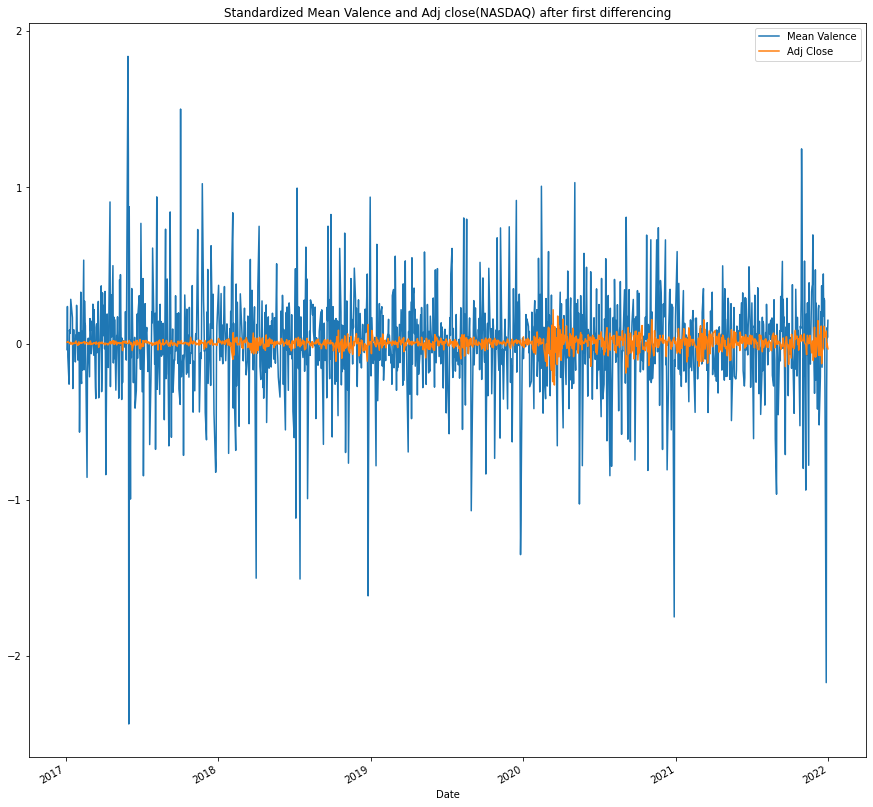

In [51]:
plt.figure(figsize = (15,15))
NASDAQ_VAR_std["mean"].diff().plot(label="Mean Valence")
NASDAQ_VAR_std["Adj Close"].diff().plot(label="Adj Close")
plt.title("Standardized Mean Valence and Adj close(NASDAQ) after first differencing")
plt.legend()
NASDAQ_VAR_std_mean_stat = NASDAQ_VAR_std["mean"].diff()
NASDAQ_VAR_std_AdjC_stat = NASDAQ_VAR_std["Adj Close"].diff()

### The Above graph is the one we obtain after differencing both the time series once

### In order to see if the series is stationary we use ADF test 

In [52]:
from statsmodels.tsa.stattools import adfuller

In [54]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [55]:
adf_test(NASDAQ_VAR_std["mean"].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.635497e+01
p-value                        2.907823e-29
#Lags Used                     8.000000e+00
Number of Observations Used    1.250000e+03
Critical Value (1%)           -3.435592e+00
Critical Value (5%)           -2.863855e+00
Critical Value (10%)          -2.568003e+00
dtype: float64


In [56]:
adf_test(NASDAQ_VAR_std["Adj Close"].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.900543e+00
p-value                        3.367036e-17
#Lags Used                     1.200000e+01
Number of Observations Used    1.246000e+03
Critical Value (1%)           -3.435609e+00
Critical Value (5%)           -2.863862e+00
Critical Value (10%)          -2.568006e+00
dtype: float64


### We can see that the test statistic is smaller than, all the critical values and hence we can safely say that the new series is stationary for both mean valence, as well as ADJ Close for NASDAQ

### Lets see ACF/PACF after differencing the dataset once

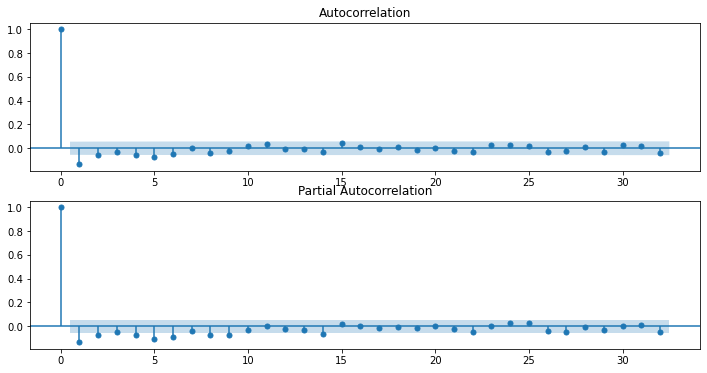

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_acf_pacf_plots(df):
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df, ax=ax[0])
    ax[1] = plot_pacf(df, ax=ax[1])


get_acf_pacf_plots(NASDAQ_VAR_std_mean_stat.reset_index()["mean"].dropna())
plt.show()

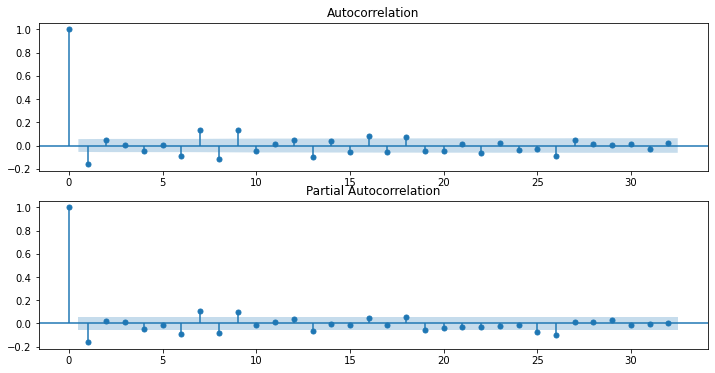

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_acf_pacf_plots(df):
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df, ax=ax[0])
    ax[1] = plot_pacf(df, ax=ax[1])


get_acf_pacf_plots(NASDAQ_VAR_std_AdjC_stat.reset_index()["Adj Close"].dropna())
plt.show()

In [59]:
from scipy.stats import pearsonr
for lag in range(1, 400):
    Adj_Close_Series = NASDAQ_VAR_std_AdjC_stat.reset_index()["Adj Close"].dropna().iloc[lag:]
    Lagged_Mean_V_series = NASDAQ_VAR_std_mean_stat.reset_index()["mean"].dropna().iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(Adj_Close_Series, Lagged_Mean_V_series))
    print('------')

Lag: 1
(-0.024747906660764978, 0.3804715345935312)
------
Lag: 2
(0.01822056398817137, 0.518663904433985)
------
Lag: 3
(-0.05005863783017999, 0.07615779470469826)
------
Lag: 4
(0.026197682157924916, 0.3537641047561653)
------
Lag: 5
(-0.005473704063810471, 0.8464560516655477)
------
Lag: 6
(0.007712365409821517, 0.7850593189759013)
------
Lag: 7
(0.008474778325892543, 0.7645020265690186)
------
Lag: 8
(-0.06137549556741293, 0.029954175313264293)
------
Lag: 9
(0.036952543918420136, 0.1916857097027009)
------
Lag: 10
(0.03154764075454831, 0.2652396099962485)
------
Lag: 11
(-0.006597238654825815, 0.8158934721183214)
------
Lag: 12
(-0.027285338254827193, 0.3356795130411923)
------
Lag: 13
(-0.024888541047609597, 0.3800587900666665)
------
Lag: 14
(0.004828211421352152, 0.8648597949180727)
------
Lag: 15
(-0.05400707572074134, 0.05686783390427047)
------
Lag: 16
(0.027515263406327012, 0.3323998761643481)
------
Lag: 17
(-0.04436228871187064, 0.11814393818726876)
------
Lag: 18
(0.00803

In [60]:
import statsmodels.api as sm
cross_corr = sm.tsa.stattools.ccf(NASDAQ_VAR_std_AdjC_stat.reset_index()["Adj Close"].dropna(), NASDAQ_VAR_std_mean_stat.reset_index()["mean"].dropna(), adjusted=False)
dicti = {}
for i in range(0,len(cross_corr)):
    dicti[i+1] = cross_corr[i]


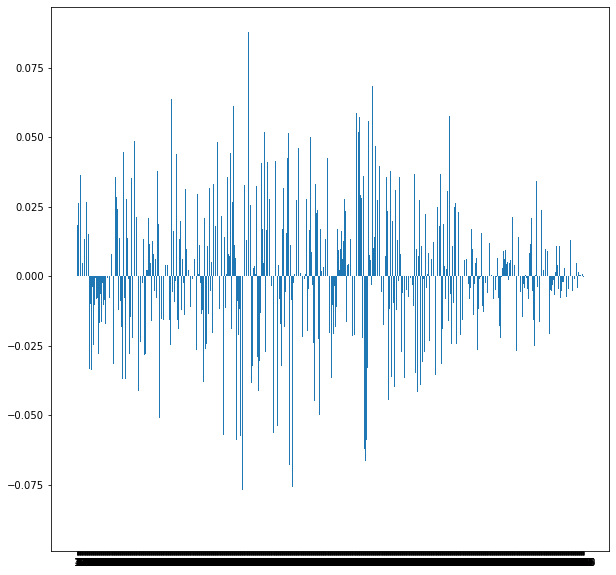

In [61]:
plt.figure(figsize=(10,10))
names = list(dicti.keys())
values = list(dicti.values())
plt.bar(range(len(dicti)), values, tick_label=names)
plt.show()

### Hence lag 364 seems significant when prediting Adj Close using Valence and ADJ close

### Fitting the model into VAR

In [62]:
from statsmodels.tsa.api import VAR

In [63]:
final_df = pd.DataFrame({"Valence": NASDAQ_VAR_std_mean_stat.reset_index()["mean"].dropna(),"ADJ Close":NASDAQ_VAR_std_AdjC_stat.reset_index()["Adj Close"].dropna()})

In [64]:
model = VAR(final_df)

C:\Users\Public\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [65]:
model_fit = model.fit(maxlags=364)

In [66]:


model_fit.summary()



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     14:29:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.469761
Nobs:                     895.000    HQIC:                  -5.29812
Log likelihood:           2625.20    FPE:                0.000929551
AIC:                     -8.28403    Det(Omega_mle):     0.000282324
--------------------------------------------------------------------
Results for equation Valence
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.064910         0.030431            2.133           0.033
L1.Valence            -0.153737         0.076721           -2.004           0.045
L1.ADJ Close          -0.002166         0.530662      

### Lets make a regression model, where 5 explanatory variables are, following measutres of central tendencies :-
#### 1. Daily Mean of valence 
#### 2. Daily Standard Deviation of valence 
#### 3. Number of daily songs, falling within 25% quartile
#### 4. Number of daily songs, falling within 50% quartile 
#### 5. Number of daily songs, falling within 75% quartile 

### The outcome variable to be predicted is :-
#### 1. Stock market value (Adj Close)

### The technique used are :-
#### 1. Muliple Linear Regression
#### 2. Random Forest Regressor
#### 3. LSTM

### Multiple Linear regresssion and LSTM 

In [38]:
NASDAQ_data.to_csv("Nasdaq_spotify.csv")

In [39]:
SP500_data= pd.merge(df, data_SP500, on ="Date", how ="inner")[["mean","std","25%","50%","75%","Adj Close","High","Low","Open","Close","Adj Close","Date"]]
SP500_data.head()

,mean,std,25%,50%,75%,Adj Close,High,Low,Open,Close,Adj Close,Date
0,0.435576,0.212973,0.26025,0.4135,0.60375,2257.830078,2263.879883,2245.129883,2251.570068,2257.830078,2257.830078,2017-01-03
1,0.434716,0.212300,0.26175,0.4180,0.59250,2270.750000,2272.820068,2261.600098,2261.600098,2270.750000,2270.750000,2017-01-04
2,0.439952,0.210511,0.27650,0.4280,0.60275,2269.000000,2271.500000,2260.449951,2268.179932,2269.000000,2269.000000,2017-01-05
3,0.438108,0.212892,0.26775,0.4210,0.59250,2276.979980,2282.100098,2264.060059,2271.139893,2276.979980,2276.979980,2017-01-06
4,0.432372,0.218671,0.25325,0.4085,0.59250,2268.899902,2275.489990,2268.899902,2273.590088,2268.899902,2268.899902,2017-01-09


In [40]:
SP500_data.to_csv("SP500_spotify.csv")

In [41]:
MLR = pd.merge(df, data, on ="Date", how ="inner")[["mean","std","25%","50%","75%","Adj Close","Date"]]
MLR.head()

,mean,std,25%,50%,75%,Adj Close,Date
0,0.435576,0.212973,0.26025,0.4135,0.60375,163.169739,2017-01-03
1,0.434716,0.212300,0.26175,0.4180,0.59250,164.508743,2017-01-04
2,0.439952,0.210511,0.27650,0.4280,0.60275,164.394012,2017-01-05
3,0.438108,0.212892,0.26775,0.4210,0.59250,162.242004,2017-01-06
4,0.432372,0.218671,0.25325,0.4085,0.59250,162.146347,2017-01-09


<AxesSubplot:>

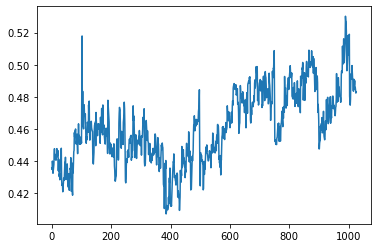

In [42]:
MLR["mean"].plot()


<AxesSubplot:>

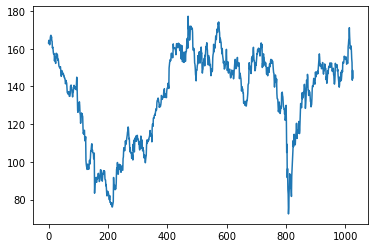

In [43]:
MLR["Adj Close"].plot()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn
import math

In [45]:
x= MLR[["mean","std","25%","50%","75%"]]
y= MLR["Adj Close"]


In [46]:
object= StandardScaler()
scale = object.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(scale,y,test_size=0.2)

In [48]:
x_train

array([[ 1.80109811,  1.03539018,  1.41946764,  1.85428934,  1.5582752 ],
       [ 0.11257582,  0.00461917,  0.74966519, -0.05387446,  0.08135524],
       [ 1.09875875,  0.03797549,  0.96278415,  1.0951274 ,  0.79531655],
       ...,
       [ 2.06324069,  1.09205729,  1.70362626,  1.77221778,  1.97825244],
       [ 1.06363153, -0.41119709,  1.44991321,  0.84891271,  0.42433665],
       [-0.81071986,  0.45637439, -1.14810843, -0.8130364 , -0.5066129 ]])

In [49]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred=linreg.predict(x_test)
y_pred

array([138.7786618 , 135.03625733, 122.28201804, 136.10456811,
       130.40124871, 115.35131017, 118.80471436, 154.1000834 ,
       145.63333479, 122.54773763, 135.43245147, 129.91104943,
       148.55669242, 129.67952607, 122.32579532, 114.85357796,
       134.83959024, 121.42726797, 143.03439767, 127.32344533,
       139.77893525, 140.62762976, 131.64437759, 141.45348185,
       124.98025055, 133.56848158, 129.24065394, 148.11280952,
       113.26152171, 119.34488269, 151.73705921, 127.5382698 ,
       111.69692977, 151.49536895, 141.24742509, 131.99035605,
       151.00010394, 135.65855189, 149.73195999, 110.67649345,
       139.22270055, 154.34241869, 127.87890995, 143.34470284,
       123.45434293, 127.49116556, 140.98061076, 131.61486965,
       118.55458574, 102.4925831 , 137.05323958, 153.76686212,
       138.3382286 , 124.89156257, 141.71770876, 135.56159767,
       149.66610376, 151.30298618, 134.67163993, 118.24859444,
       126.71293681, 122.16752987, 155.16636266, 107.13

In [51]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(" Accuracy of the model is %.2f" %math.sqrt(mse))

 Accuracy of the model is 19.92


In [52]:
plt.plot?

Text(0, 0.5, 'Predicted')

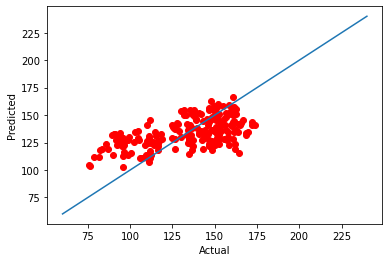

In [53]:
y = list(range(60,241))
plt.scatter(y_test,y_pred, color= 'red')
plt.plot(y,y)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [54]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [55]:
y_pred=rf.predict(x_test)
y_pred

array([144.84011404, 153.49054177, 147.14843475, 143.25722708,
       131.72497934, 122.80564275,  91.7402632 , 154.48145324,
       162.82823254, 102.48879758, 144.45138242, 157.05140775,
       145.40833839, 146.07697883, 140.32907887, 141.57520182,
       143.40283318,  97.80908725, 148.30035183, 147.3989192 ,
       150.90058373, 149.56084087, 150.81635918, 153.26443674,
       136.96127409, 132.33393246, 137.2542789 , 160.6079176 ,
       107.17615177, 119.01389944, 159.71495019, 147.40155219,
       110.17129779, 158.54321338, 156.50941352, 125.8767376 ,
       152.85059698, 104.69122569, 139.18473096,  99.80081022,
       105.44249397, 148.50576422, 138.24477143, 119.95793185,
       142.91774443,  94.13648561, 153.8682995 , 113.14769122,
       145.57259543, 109.62913628, 124.63367818, 133.24242933,
       137.01039426, 136.35893982, 139.23233817, 125.88486147,
       142.53631796, 159.48142221, 125.2826495 , 123.87919452,
       154.70090672,  95.75336633, 148.551074  ,  94.35

In [56]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(" RMSE of the model is %.2f" %math.sqrt(mse))

 RMSE of the model is 14.36


Text(0, 0.5, 'Predicted')

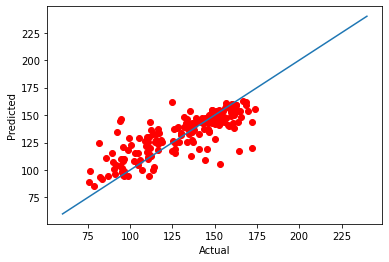

In [57]:
y = list(range(60,241))
plt.scatter(y_test,y_pred, color= 'red')
plt.plot(y,y)
plt.xlabel('Actual')
plt.ylabel('Predicted')

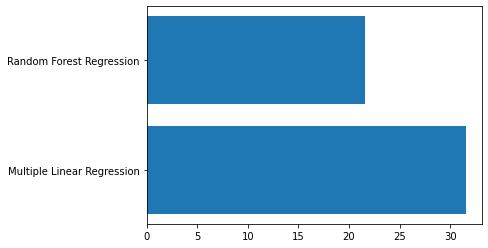

In [58]:
data = {'Multiple Linear Regression': 31.51, 'Random Forest Regression': 21.58}
names = list(data.keys())
values = list(data.values())
plt.barh(range(len(data)), values, tick_label=names)
plt.show()